In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

for dirname, _, filenames in os.walk(r'C:\Users\Sukanmi\Desktop\segun\segun dataset\credit_test.csv\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print()

In [3]:
df = pd.read_csv (r'C:\Users\Sukanmi\Desktop\segun\segun dataset\credit_test.csv')
df

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [5]:
df.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)
df.isna().sum()

Current Loan Amount              353
Term                             353
Credit Score                    2334
Annual Income                   2334
Years in current job             780
Home Ownership                   353
Purpose                          353
Monthly Debt                     353
Years of Credit History          353
Months since last delinquent    5659
Number of Open Accounts          353
Number of Credit Problems        353
Current Credit Balance           353
Maximum Open Credit              353
Bankruptcies                     375
Tax Liens                        354
dtype: int64

In [6]:
df.dropna(axis = 0 , how = 'all' , inplace = True)
df.isna().sum()

Current Loan Amount                0
Term                               0
Credit Score                    1981
Annual Income                   1981
Years in current job             427
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5306
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      22
Tax Liens                          1
dtype: int64

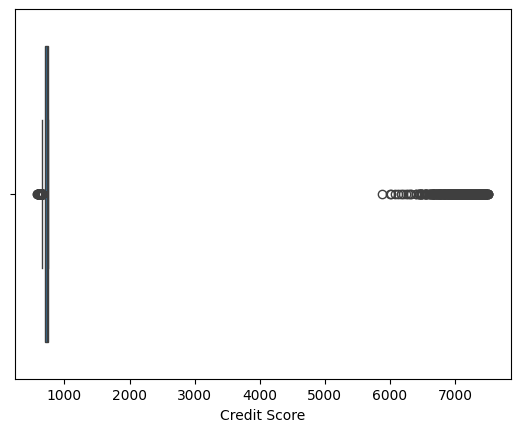

In [7]:
sns.boxplot(x = df['Credit Score'])
plt.show()

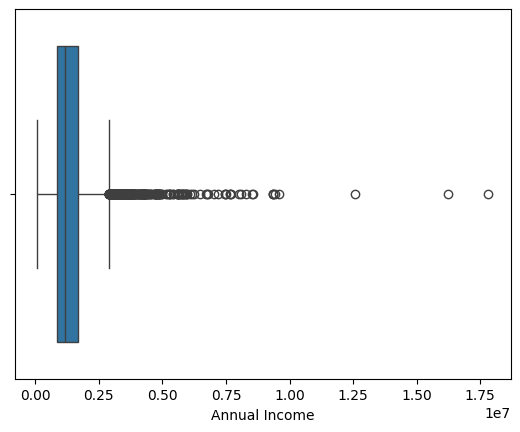

In [8]:
sns.boxplot(x = df['Annual Income'])
plt.show()

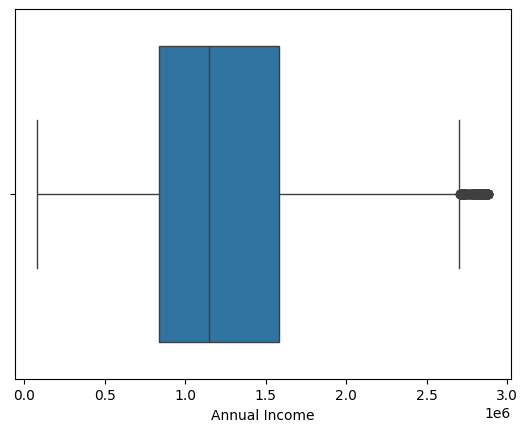

In [9]:
Q1 = df['Annual Income'].quantile(0.25, interpolation='midpoint')
Q3 = df['Annual Income'].quantile(0.75, interpolation='midpoint')
IQR = Q3 - Q1 
Min_out = df['Annual Income'] < Q1 - 1.5*IQR
Max_out = df['Annual Income'] > Q3 + 1.5*IQR
df = df[~(Min_out | Max_out)]
sns.boxplot(x = df['Annual Income'])
plt.show()

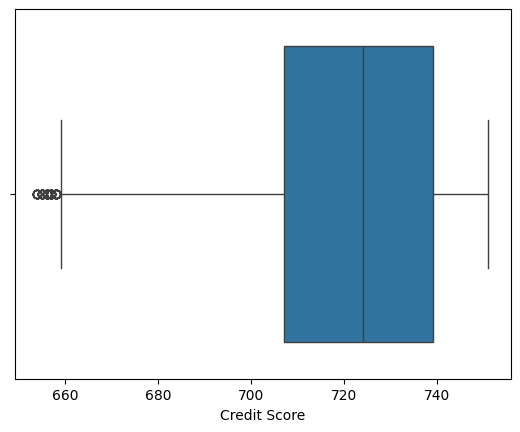

In [10]:
Q1 = df['Credit Score'].quantile(0.25, interpolation='midpoint')
Q3 = df['Credit Score'].quantile(0.75, interpolation='midpoint')
IQR = Q3 - Q1 
Min_out = df['Credit Score'] < Q1 - 1.5*IQR
Max_out = df['Credit Score'] > Q3 + 1.5*IQR
df = df[~(Min_out | Max_out)]
sns.boxplot(x = df['Credit Score'])
plt.show()

In [11]:
df['Credit Score'].fillna(df['Credit Score'].mean, inplace=True)
df['Annual Income'].fillna(df['Annual Income'].mean,inplace = True)

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\3742926074.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0       747.0
1       734.0
2       709.0
3       727.0
4       744.0
        ...  
9995    731.0
9996    718.0
9997      NaN
9998    721.0
9999    748.0
Name: Credit Score, Length: 8952, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Credit Score'].fillna(df['Credit Score'].mean, inplace=True)
C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\3742926074.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0       2074116.0
1       1919190.0
2        871112.0
3        780083.0
4       1761148.0
          ...    
9995    1514376.0
9996     763192.0
9997          NaN
9998     972097.0
9999 

In [12]:
df['Years in current job'].unique()

array(['10+ years', '2 years', '1 year', '< 1 year', '5 years', '7 years',
       '3 years', '6 years', '8 years', '4 years', nan, '9 years'],
      dtype=object)

In [13]:
df['Years in current job'].fillna("10+ years",inplace = True)
df['Years in current job'].replace(['< 1 year', '1 year', '2 years' , '3 years' , '4 years' , '5 years'], '1-5 years',inplace = True)
df['Years in current job'].replace(['6 years', '7 years' , '8 years' , '9 years'], '6-9 years',inplace = True)

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\738694781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years in current job'].fillna("10+ years",inplace = True)


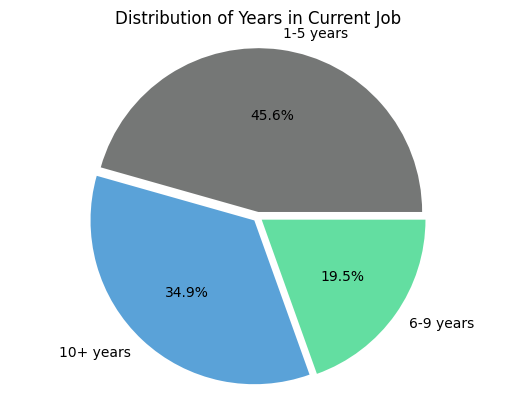

In [14]:
counts = df['Years in current job'].value_counts()
labels = counts.index
sizes = counts.values

Colors = ['#757776','#5aa2d8','#63dea1']
plt.pie(sizes, labels=labels, colors=Colors, 
        autopct='%1.1f%%',explode=[0.03,0.03,0.03])
plt.axis('equal')
plt.title('Distribution of Years in Current Job')
plt.show()

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\2898444518.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Home Ownership'].replace(['HaveMortgage', 'Home Mortgage'],'Under mortgage', inplace = True)


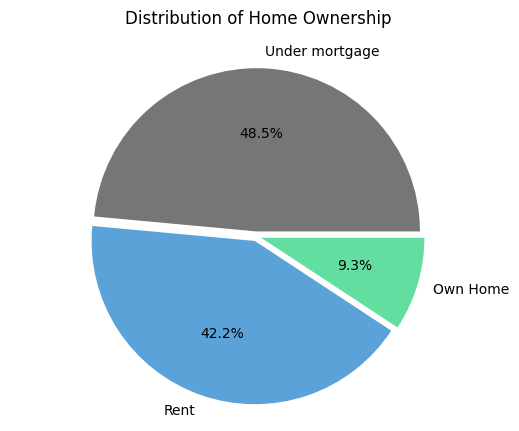

In [15]:
df['Home Ownership'].unique()
# Home mortgage and Have mortgage are the same meaning
df['Home Ownership'].replace(['HaveMortgage', 'Home Mortgage'],'Under mortgage', inplace = True)
counts = df['Home Ownership'].value_counts()
labels = counts.index
sizes = counts.values
Colors = ['#757776','#5aa2d8','#63dea1']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = Colors ,explode=[0.03,0.03,0.03])
plt.axis('equal')
plt.title('Distribution of Home Ownership', loc='center', pad=20)
plt.show()

In [16]:
df['Months since last delinquent'].value_counts()
df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean,inplace = True)

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\1951381514.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0        NaN
1        NaN
2       10.0
3       27.0
4       44.0
        ... 
9995     NaN
9996    20.0
9997     NaN
9998    24.0
9999     NaN
Name: Months since last delinquent, Length: 8952, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean,inplace = True)


In [17]:
df['Maximum Open Credit'].value_counts()
df['Maximum Open Credit'].fillna(0,inplace = True)

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\478912105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Maximum Open Credit'].fillna(0,inplace = True)


In [18]:
df['Bankruptcies'].value_counts()
df['Bankruptcies'].fillna(0,inplace = True)

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\652203179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bankruptcies'].fillna(0,inplace = True)


In [19]:
df['Tax Liens'].value_counts()
df['Tax Liens'].fillna(0,inplace = True)

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\3314892270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tax Liens'].fillna(0,inplace = True)


<Axes: >

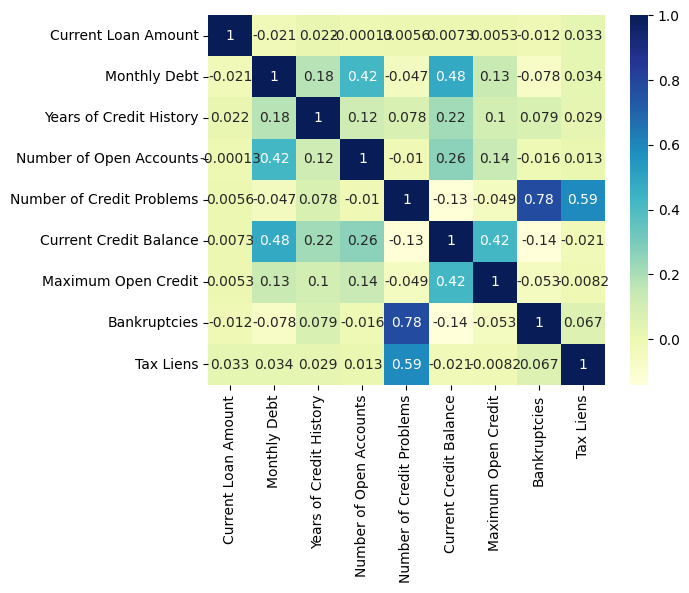

In [20]:
# To know the correlation between columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\1365132856.py:4: UserWarning: 
The palette list has fewer values (2) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Purpose',data=df,hue='Purpose', palette = Colors)


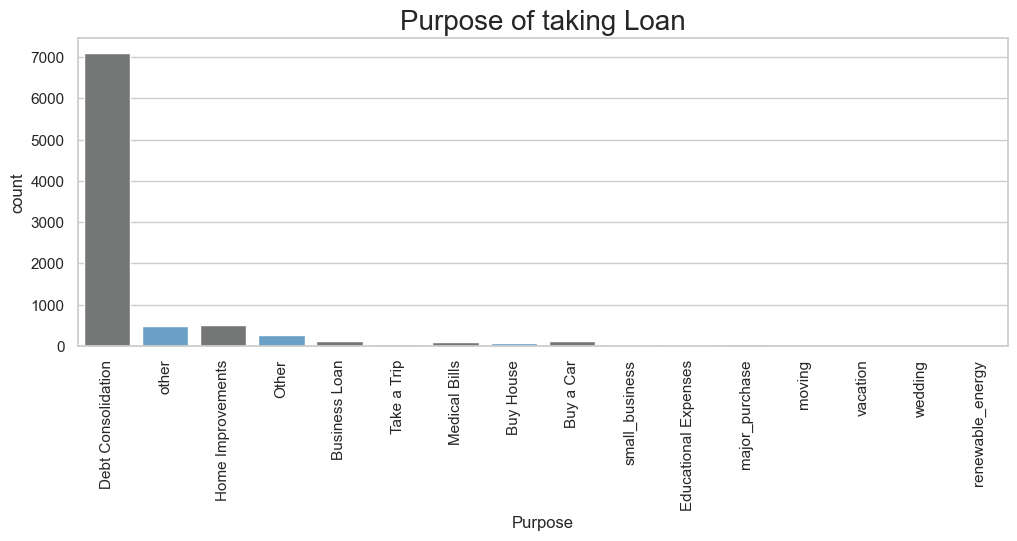

In [21]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
Colors = ['#757776','#5aa2d8']
sns.countplot(x='Purpose',data=df,hue='Purpose', palette = Colors)
plt.xticks(rotation=90)
plt.title('Purpose of taking Loan',fontdict={'fontsize':20})
plt.show()

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\1686900306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Term', data=df, palette = Colors)


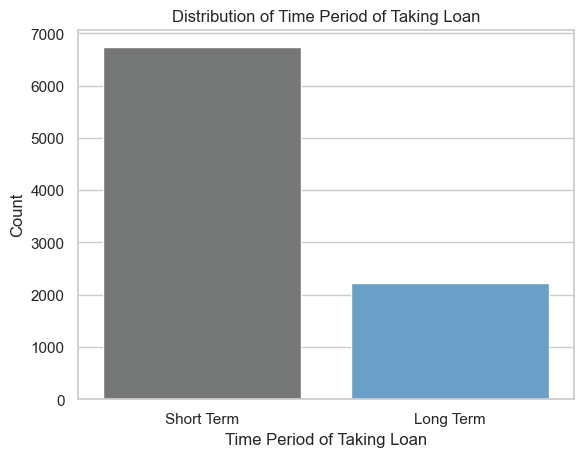

In [22]:
sns.set(style="whitegrid")
Colors = ['#757776','#5aa2d8']
sns.countplot(x='Term', data=df, palette = Colors)
plt.title("Distribution of Time Period of Taking Loan")
plt.xlabel("Time Period of Taking Loan")
plt.ylabel("Count")
plt.show()

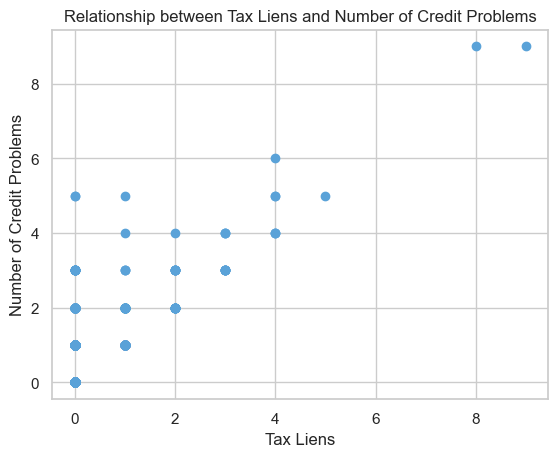

In [23]:
Color = ['#5aa2d8']
plt.scatter(df['Tax Liens'], df['Number of Credit Problems'], c = Color)
plt.title("Relationship between Tax Liens and Number of Credit Problems")
plt.xlabel("Tax Liens")
plt.ylabel("Number of Credit Problems")
plt.show()

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\976446247.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Number of Open Accounts'],palette = Color)
C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_14892\976446247.py:4: UserWarning: 
The palette list has fewer values (1) than needed (43) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df['Number of Open Accounts'],palette = Color)


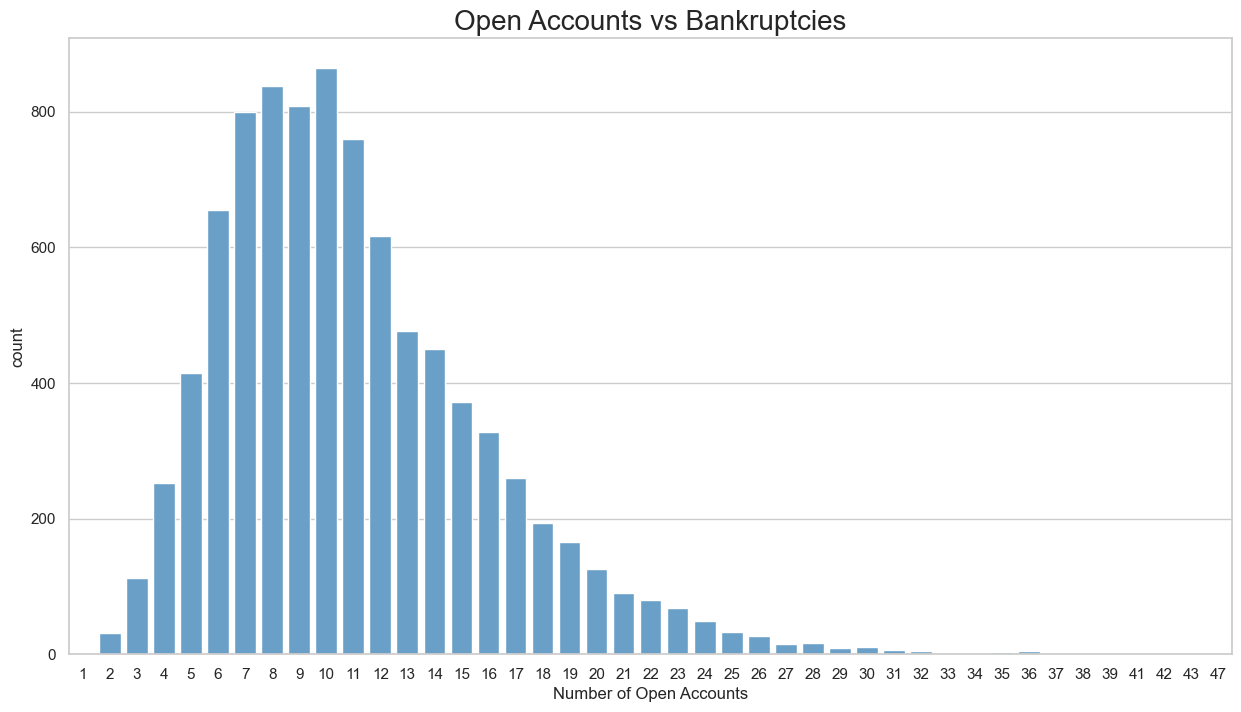

In [24]:
Color = ['#5aa2d8']
df['Number of Open Accounts']=df['Number of Open Accounts'].astype(np.int64)
plt.figure(figsize=(15,8))
sns.countplot(x=df['Number of Open Accounts'],palette = Color)
plt.title('Open Accounts vs Bankruptcies',fontdict={'fontsize':20})
plt.show()

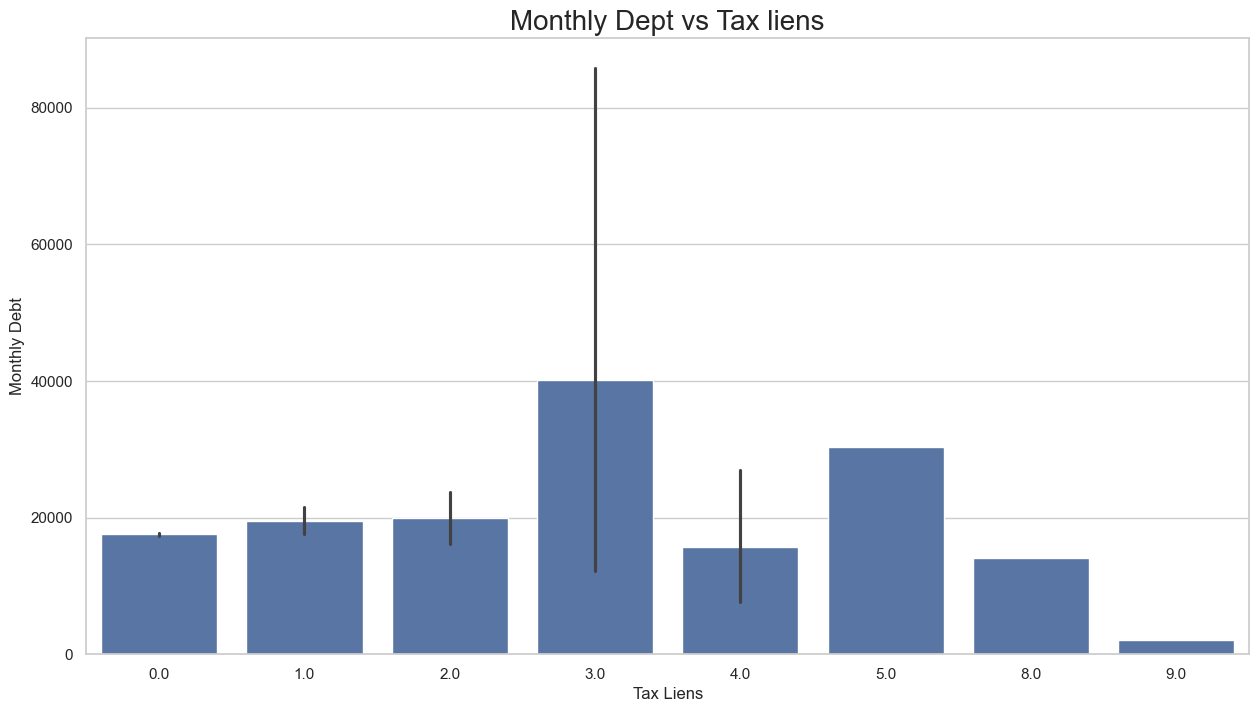

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Tax Liens'],y=df['Monthly Debt'])
plt.title('Monthly Dept vs Tax liens',fontdict={'fontsize':20})
plt.show()